In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iml24-term-project/test.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iml24-term-project/train.csv')
# Set display options to show full rows and columns
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks in DataFrame representation

In [24]:
test

Output hidden; open in https://colab.research.google.com to view.

In [5]:
train

,ID,log_pSat_Pa,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,...,ester,ether (alicyclic),nitrate,nitro,aromatic hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester
0,0,-11.295070,224.016832,23,6,9,0,4,485.0,40.0,...,0,1,0,0,0,0,0,2,0,0
1,1,-4.782500,310.064845,35,9,10,2,1,236.0,40.0,...,0,0,2,0,0,0,0,1,0,0
2,2,-6.204319,368.033938,37,10,13,2,1,308.0,40.0,...,0,0,1,0,0,1,0,1,0,0
3,3,-9.672591,299.012475,29,7,12,1,4,769.0,3.0,...,0,0,1,0,0,0,0,1,1,0
4,4,-4.252058,202.011353,20,7,7,0,1,77.0,32.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26632,31632,-1.210727,221.017166,22,6,8,1,1,47.0,37.0,...,0,1,1,0,0,0,0,1,0,0
26633,31633,-7.525230,222.001182,21,6,9,0,3,323.0,12.0,...,0,0,0,0,0,0,1,0,0,0
26634,31634,-8.852094,287.012475,28,6,12,1,4,362.0,11.0,...,0,0,1,0,0,0,1,2,0,0
26635,31635,-6.564478,284.996825,26,6,12,1,3,322.0,35.0,...,0,0,1,0,0,0,1,1,1,0


In [8]:
train.shape

(26637, 27)

In [12]:
#check for missing values
train.isnull().sum()

,0
ID,0
log_pSat_Pa,0
MW,0
NumOfAtoms,0
NumOfC,0
NumOfO,0
NumOfN,0
NumHBondDonors,0
NumOfConf,0
NumOfConfUsed,0


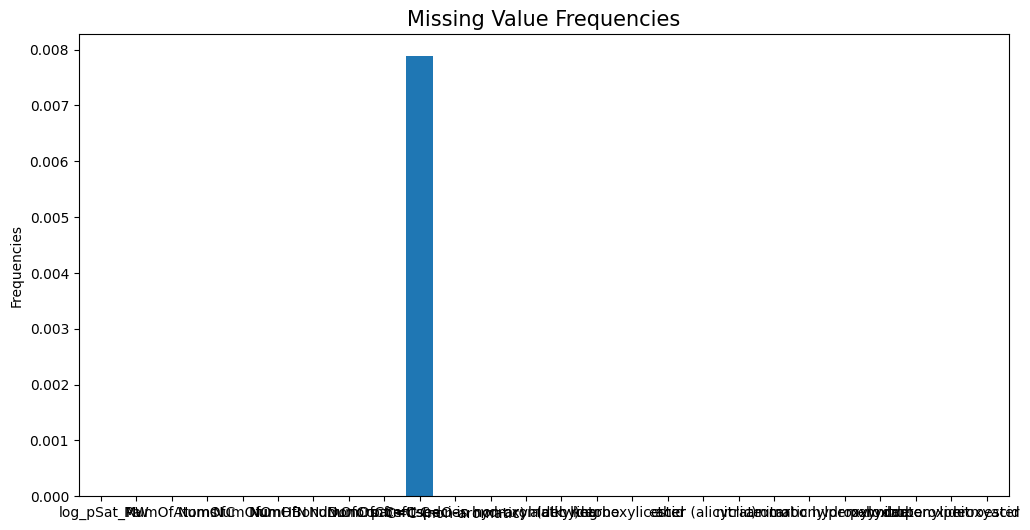

In [13]:
# deal with missing values
df_miss_num = train.iloc[:, 1:].isnull().sum()
df_total_num = train.shape[0]
df_miss_freq = df_miss_num / df_total_num

#print(df_miss_freq.apply(lambda x: format(x, '.2%')).to_string())

plt.figure(figsize=(12, 6))
df_miss_freq.plot.bar(width=0.75, rot=0, ax=plt.gca())
plt.ylabel('Frequencies')
plt.title('Missing Value Frequencies', fontsize=15)

plt.show()



```
# only parentspecies has 210 missing values, categorial variable, but percentage not high, maybe replace missing value with mode instead of omit this independent variable?
```



In [12]:
mode_value = train['parentspecies'].mode()[0]

# Fill missing values with the mode for the parentspecies cannot be retrieved ?
train['parentspecies']=train['parentspecies'].fillna(mode_value)

In [7]:
mode_value

'toluene'

In [13]:
train['parentspecies']

,parentspecies
0,toluene
1,apin
2,apin
3,toluene
4,toluene
...,...
26632,toluene
26633,toluene
26634,toluene
26635,toluene


In [ ]:
# do we drop the ambiguous 'parentspecies'?

In [14]:
#check if any abnormal data
stats=train.iloc[:, 1:].describe().T
stats
#numofconf

,count,mean,std,min,25%,50%,75%,max
log_pSat_Pa,26637.0,-5.516747,3.120191,-18.822563,-7.515147,-5.450577,-3.429192,8.390642
MW,26637.0,264.638341,49.618151,30.010565,233.017166,266.986260,299.012475,386.044503
NumOfAtoms,26637.0,26.251567,5.229818,4.000000,23.000000,26.000000,30.000000,41.000000
NumOfC,26637.0,6.862409,1.453679,1.000000,6.000000,7.000000,7.000000,10.000000
NumOfO,26637.0,9.937042,2.485167,0.000000,8.000000,10.000000,12.000000,17.000000
NumOfN,26637.0,1.063558,0.710745,0.000000,1.000000,1.000000,2.000000,2.000000
NumHBondDonors,26637.0,2.201637,1.021029,0.000000,2.000000,2.000000,3.000000,6.000000
NumOfConf,26637.0,229.856778,203.234312,1.000000,72.000000,173.000000,332.000000,1743.000000
NumOfConfUsed,26637.0,25.700417,14.689993,1.000000,11.000000,30.000000,40.000000,40.000000
C=C (non-aromatic),26637.0,0.091001,0.288268,0.000000,0.000000,0.000000,0.000000,2.000000


In [ ]:
#deal with categorial independent variable 'parent species'
#one-hot encoding( for unordered data ) label encoding (for ordered data)
#I used one-hot encoding, better ways to handle this?

In [ ]:
#check multicolliearity

In [16]:
train.columns.tolist()

['ID',
 'log_pSat_Pa',
 'MW',
 'NumOfAtoms',
 'NumOfC',
 'NumOfO',
 'NumOfN',
 'NumHBondDonors',
 'NumOfConf',
 'NumOfConfUsed',
 'parentspecies',
 'C=C (non-aromatic)',
 'C=C-C=O in non-aromatic ring',
 'hydroxyl (alkyl)',
 'aldehyde',
 'ketone',
 'carboxylic acid',
 'ester',
 'ether (alicyclic)',
 'nitrate',
 'nitro',
 'aromatic hydroxyl',
 'carbonylperoxynitrate',
 'peroxide',
 'hydroperoxide',
 'carbonylperoxyacid',
 'nitroester']

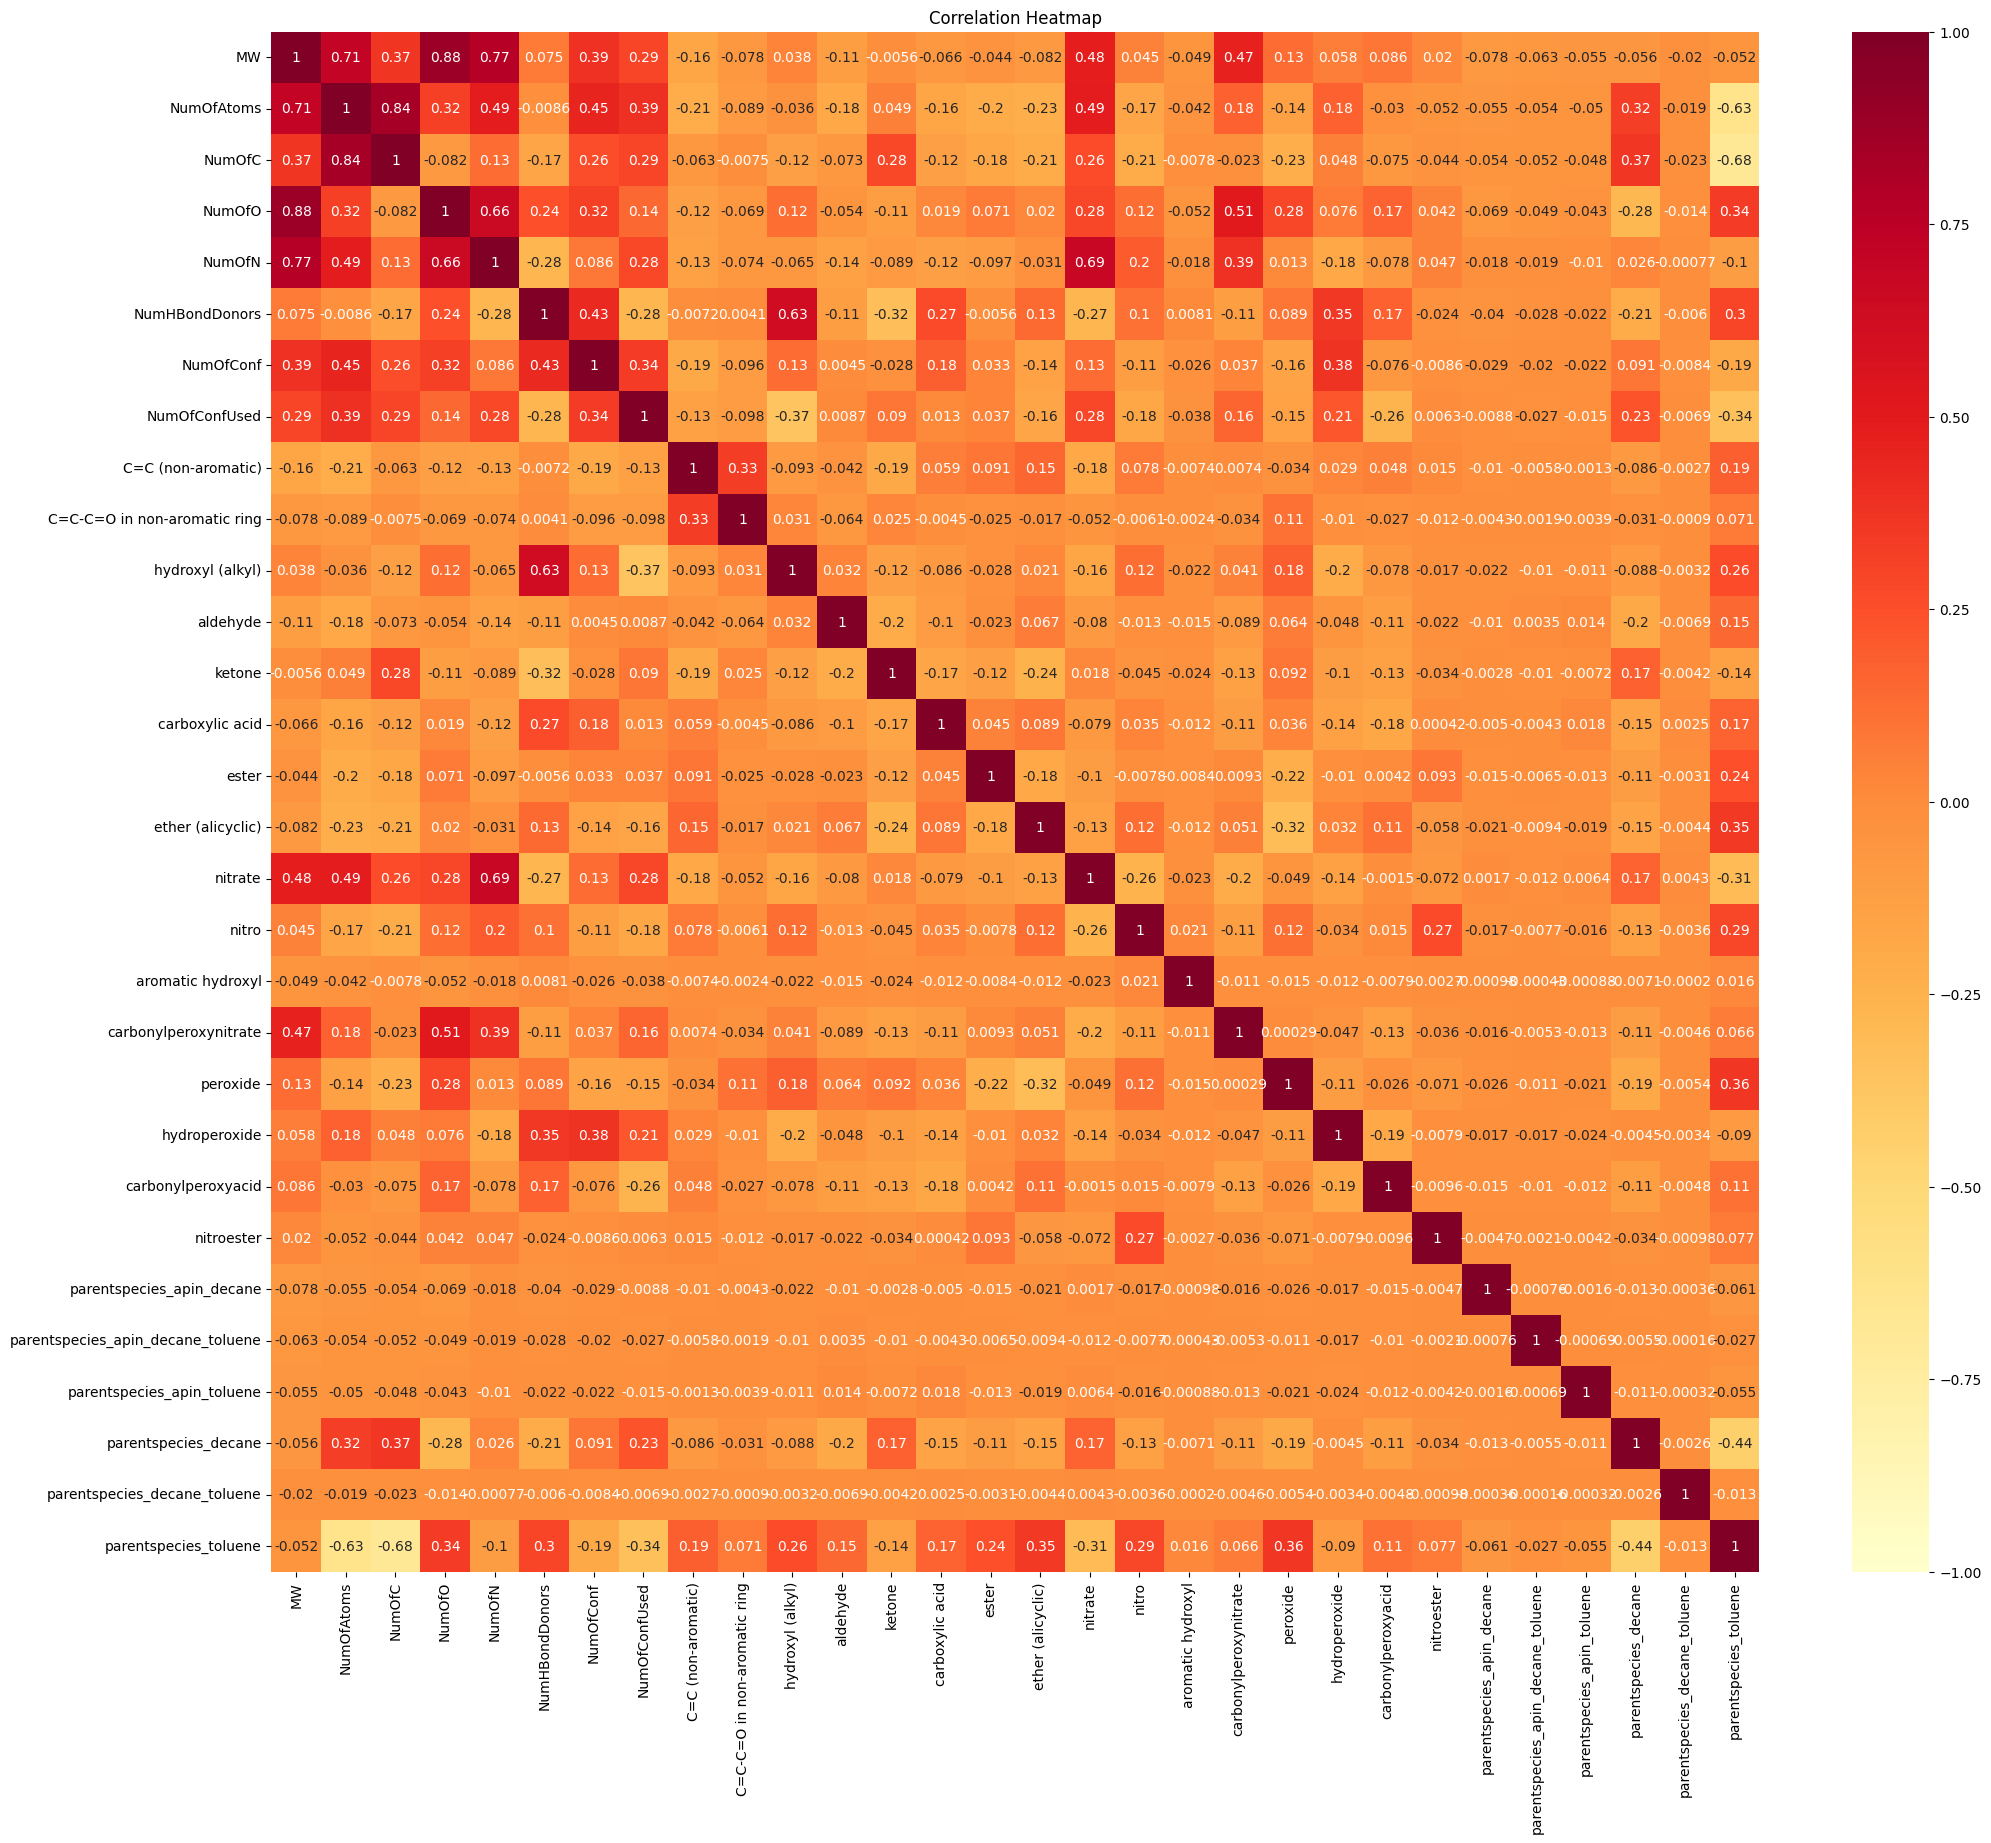

In [21]:
X = train.drop(columns=['ID', 'log_pSat_Pa'])  # Exclude ID and dependent variable

# One-hot encode the categorical variable 'parentspecies'
X_encoded = pd.get_dummies(X, columns=['parentspecies'], drop_first=True)

# Calculate the correlation matrix
corr_matrix = X_encoded.corr()

# Create the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
#strong correlation between NumOfO and MW, NumOfC and NumOfAtoms,whose correlation equal to 0.88 and 0.84 respectively. Incorporating variables that exhibit strong multicollinearity might affect the prediction accuracy of our model later on.
#NumOfO:The number of oxygen atoms in the molecule.
#MW:The molecule's molecular weight (g/mol).
#NumOfC:The number of carbon atoms in the molecule.
#NumOfAtoms: The number of atoms in the molecule.
#it's likely that they are capturing very similar information about the molecules.
#including both may not provide much additional value to the model and could lead to unstable coefficient estimates.
# maybe we can check if drop one of NumOfO and MW, and drop one of NumOfC and NumOfAtoms could improve model performance.

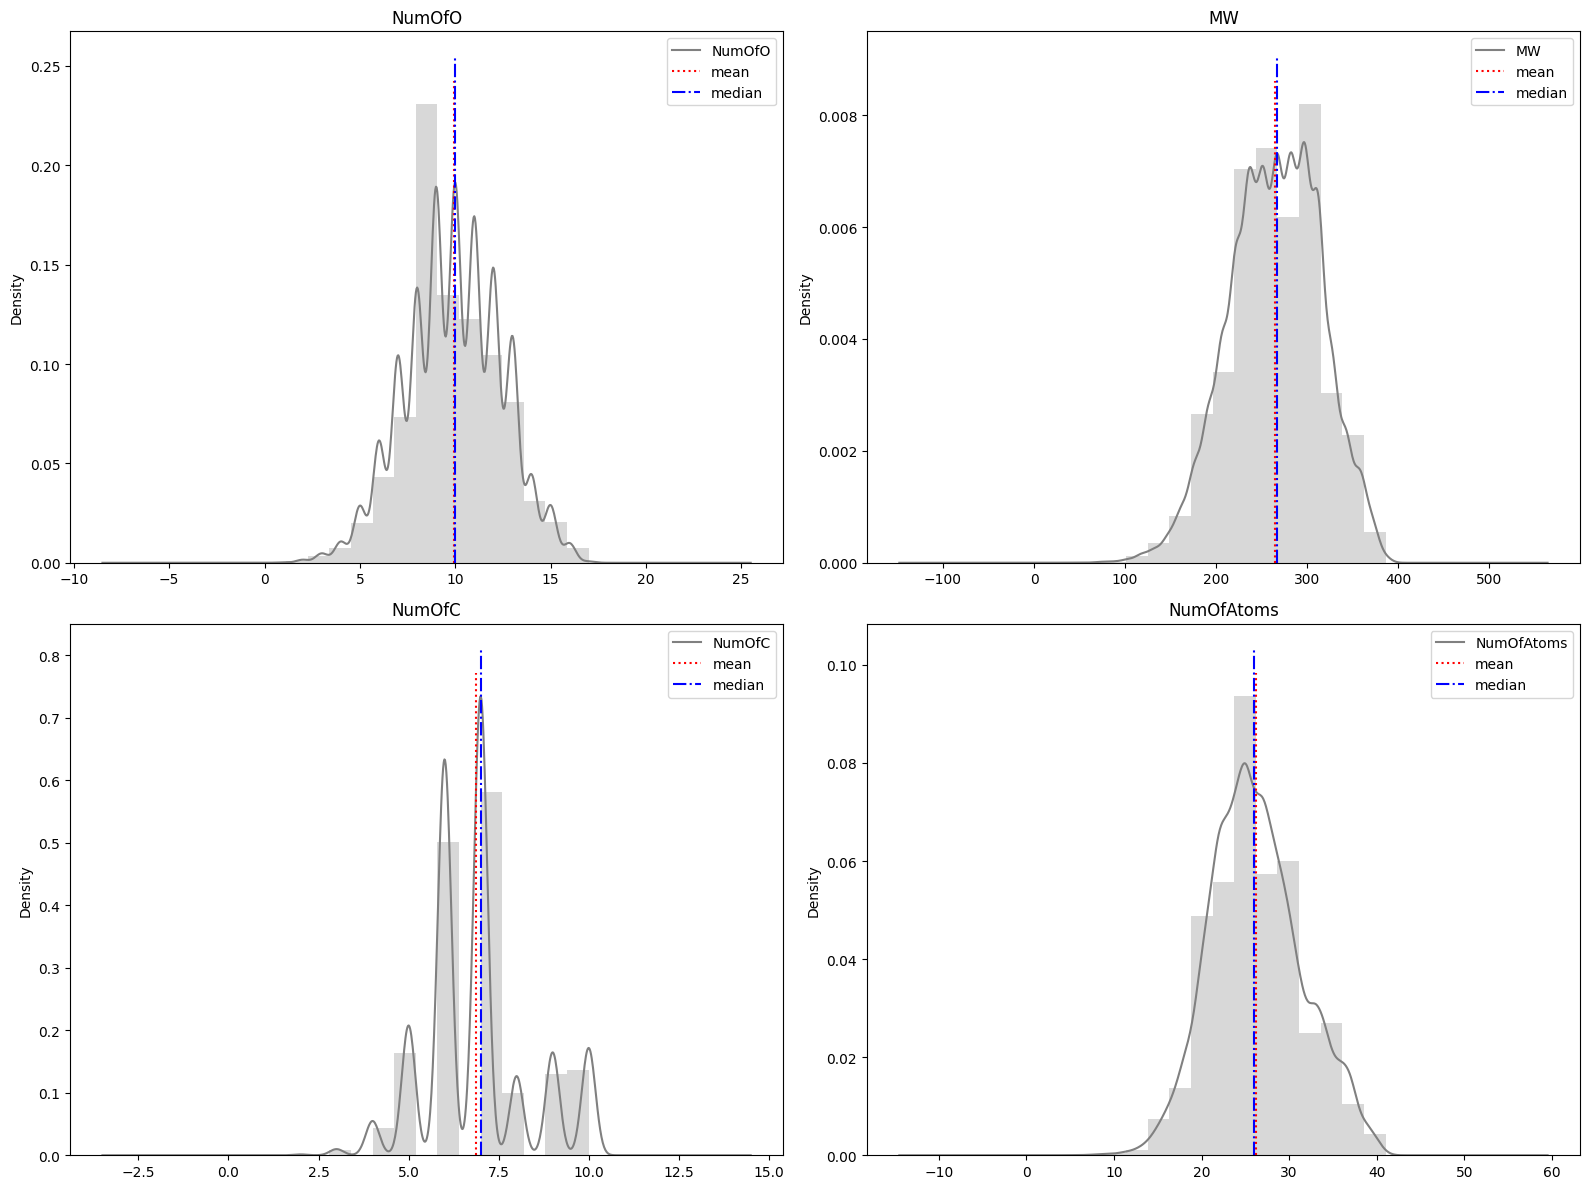

In [26]:
#from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# NumOfO distribution
ax = axes[0, 0]
train['NumOfO'].hist(bins=15, density=True, color='grey', alpha=0.3, ax=ax)
train['NumOfO'].plot(kind='density', color='grey', ax=ax)
x1 = train['NumOfO'].mean(skipna=True)
x2 = train['NumOfO'].median(skipna=True)
ax.vlines(x=x1, ymin=0, ymax=ax.get_ylim()[1], color='r', linestyles=':', label='mean')
ax.vlines(x=x2, ymin=0, ymax=ax.get_ylim()[1], color='b', linestyle='-.', label='median')
ax.set_title('NumOfO')
ax.legend()

# MW distribution
ax = axes[0, 1]
train['MW'].hist(bins=15, density=True, color='grey', alpha=0.3, ax=ax)
train['MW'].plot(kind='density', color='grey', ax=ax)
x1 = train['MW'].mean(skipna=True)
x2 = train['MW'].median(skipna=True)
ax.vlines(x=x1, ymin=0, ymax=ax.get_ylim()[1], color='r', linestyles=':', label='mean')
ax.vlines(x=x2, ymin=0, ymax=ax.get_ylim()[1], color='b', linestyle='-.', label='median')
ax.set_title('MW')
ax.legend()

# NumOfC distribution
ax = axes[1, 0]
train['NumOfC'].hist(bins=15, density=True, color='grey', alpha=0.3, ax=ax)
train['NumOfC'].plot(kind='density', color='grey', ax=ax)
x1 = train['NumOfC'].mean(skipna=True)
x2 = train['NumOfC'].median(skipna=True)
ax.vlines(x=x1, ymin=0, ymax=ax.get_ylim()[1], color='r', linestyles=':', label='mean')
ax.vlines(x=x2, ymin=0, ymax=ax.get_ylim()[1], color='b', linestyle='-.', label='median')
ax.set_title('NumOfC')
ax.legend()

# NumOfAtoms distribution
ax = axes[1, 1]
train['NumOfAtoms'].hist(bins=15, density=True, color='grey', alpha=0.3, ax=ax)
train['NumOfAtoms'].plot(kind='density', color='grey', ax=ax)
x1 = train['NumOfAtoms'].mean(skipna=True)
x2 = train['NumOfAtoms'].median(skipna=True)
ax.vlines(x=x1, ymin=0, ymax=ax.get_ylim()[1], color='r', linestyles=':', label='mean')
ax.vlines(x=x2, ymin=0, ymax=ax.get_ylim()[1], color='b', linestyle='-.', label='median')
ax.set_title('NumOfAtoms')
ax.legend()

plt.tight_layout()
plt.show()